FileNotFoundError: [Errno 2] No such file or directory: '/data/pt_01880/psc_se.npy'

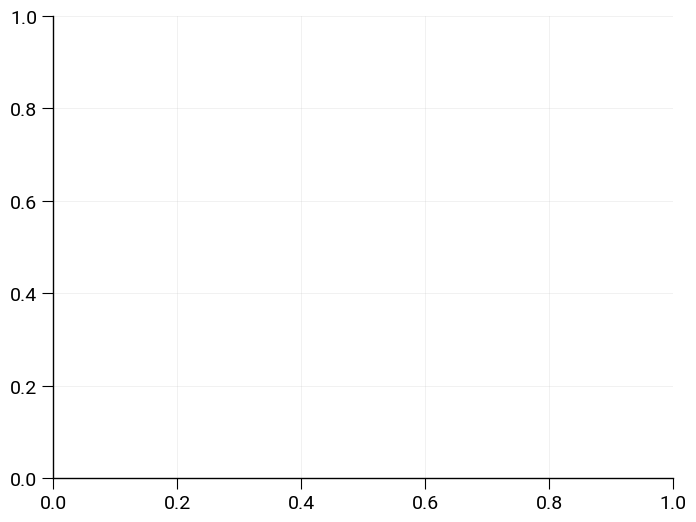

In [41]:
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
from scipy.stats import sem
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
plt.style.use(os.path.join(module_path, "src", "default.mplstyle"))

subjects = ["p1", "p2", "p3", "p4", "p5"]
session = "se"

N_LAYER = 11
DIR_DATA = "/data/pt_01880"

def get_sessions(x, size):
    # x = 0: odd (second)
    # x = 1: even (first)
    c = []
    for num in range(size):
        # checking condition
        if num % 2 != x:
            c.append(num)
    return c

def plot_data(session, color, label):

    file = Path(DIR_DATA) / f"psc_{session}.npy"
    data = np.load(file)
    ncols = np.shape(data)[1]

    y_all = np.mean(data, axis=1)
    y_all_sem = sem(data, axis=1)
    #y_first = np.mean(data[:, get_sessions(1, ncols)], axis=1)
    #y_second = np.mean(data[:, get_sessions(0, ncols)], axis=1)
    plt.plot(np.linspace(0, 1, N_LAYER), y_all, color=color, linewidth=2, label=label)
    #plt.plot(np.linspace(0, 1, N_LAYER), y_first, color="gray", linewidth=2, label=label)
    #plt.plot(np.linspace(0, 1, N_LAYER), y_second, color="red", linewidth=2, label=label)
    plt.fill_between(np.linspace(0, 1, N_LAYER), y_all-y_all_sem, y_all+y_all_sem, facecolor=color, interpolate=True, alpha=0.24, label="Standard error across subjects (both sessions)")
    #y_mean = np.array(y_mean)
    #y_mean = np.mean(y_mean, axis=0)
    #y_sem = sem(y_mean, axis=0)

    #if part == 2:
    #    plt.plot(np.linspace(0, 1, nlayer), y_mean, color=color, linestyle=linestyle, linewidth=2, label=label)
    #    #plt.errorbar(np.arange(nlayer), y_mean, y_sem, fmt='.-', color=color, alpha=alpha)
    #    plt.fill_between(np.linspace(0, 1, nlayer), y_mean-y_sem, y_mean+y_sem, facecolor=color, interpolate=True, alpha=0.24, label="Standard error across subjects (both sessions)")
    #    #plt.plot(np.arange(nlayer), y_mean-y_sem, linestyle="--", linewidth=2, color=color, alpha=alpha)
    #    #plt.plot(np.arange(nlayer), y_mean+y_sem, linestyle="--", linewidth=2, color=color, alpha=alpha)
    #else:
    #    plt.plot(np.linspace(0, 1, nlayer), y_mean, color=color, linestyle=linestyle, label=label)

fig, ax = plt.subplots(figsize=(8,6))
if session == "vaso":
    color="#1990BE"
    file_out = "/data/pt_01880/psc_vaso.svg"
elif session == "ge":
    color="#A12A48"
    file_out = "/data/pt_01880/psc_ge.svg"
elif session == "se":
    color="#57B154"
    file_out = "/data/pt_01880/psc_se.svg"
plot_data(session, color=color, label="Mean across subjects (both sessions)")
#plot_data(f, part=1, color="gray", linestyle="-", label="Mean across subjects (second session)")
#plot_data(f, part=2, color=color, linestyle="-", label="Mean across subjects (both sessions)")
plt.xlabel(r"GM/WM $\rightarrow$ GM/CSF")
plt.ylabel("Signal change in %")
plt.legend(loc="lower right")
fig.savefig(file_out, dpi=300, bbox_inches="tight", transparent=True, format="svg")

[0, 2, 4, 6, 8]
